In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc

#그래프에서 한글을 사용하기 위해서 설정
if platform.system() == 'Darwin':
    rc('font', family="AppleGothic")
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
    rc('font', family=font_name)

#그래프에 음수를 사용하기 위해서 설정
plt.rcParams['axes.unicode_minus'] = False

     국어  영어  수학
이름             
박지영  90  85  55
김태함  70  65  80
김효섭  92  95  76
임경희  76  89  88
권혁진  97  87  83
하혜진  80  86  97
이준원  20  30  40
윤정웅  50  52  54
주시현  95  70  80


<Axes: xlabel='이름'>

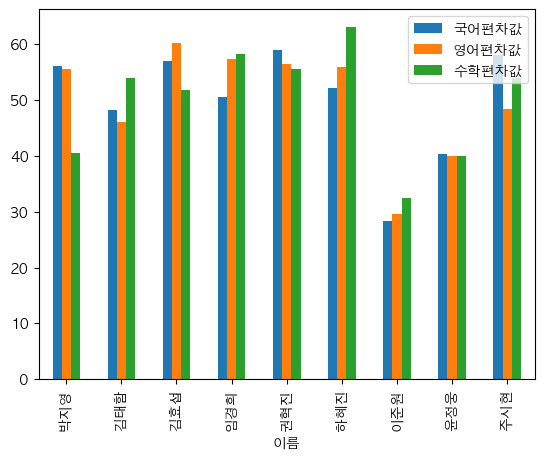

In [12]:
#student.csv 파일을 읽어오기
#이름을 인덱스로 사용
df = pd.read_csv("./data/student.csv", encoding='ms949', index_col='이름')
print(df)

# df.plot(kind='bar')

#위 데이터의 경우 단순한 표준화 작업만으로는 성적을 비교하는 것이 어려울 수 있음
#최대값이나 최대값-최소값으로 나눈 데이터로는 비교하기가 어려움
#이런 경우에는 표준값이나 편차값을 구해서 비교하는 것이 좋습니다.

#평균과 표준 편차 구하기
kormean, korstd = df['국어'].mean(), df['국어'].std()
engmean, engstd = df['영어'].mean(), df['영어'].std()
matmean, matstd = df['수학'].mean(), df['수학'].std()

#표준값 구하기
df['국어표준값'] = (df['국어']-kormean)/korstd
df['영어표준값'] = (df['영어']-engmean)/engstd
df['수학표준값'] = (df['수학']-matmean)/matstd

#편차값 구하기
df['국어편차값'] = df['국어표준값'] * 10 + 50
df['영어편차값'] = df['영어표준값'] * 10 + 50
df['수학편차값'] = df['수학표준값'] * 10 + 50

df[['국어편차값', '영어편차값', '수학편차값']].plot(kind='bar')

In [13]:
###표준화

In [15]:
#데이터 읽어오기
auto_mpg = pd.read_csv('./data/auto-mpg.csv', header=None)
#컬럼 이름 설정
auto_mpg.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
                   'acceleration', 'model year', 'origin', 'name']
#horsepower 열의 자료형을 실수로 변경
#?를 None으로 치환하고 제거한 후 자료형 변경
auto_mpg['horsepower'].replace('?', np.nan, inplace=True)
auto_mpg.dropna(subset=['horsepower'], axis=0, inplace=True)
auto_mpg['horsepower']=auto_mpg['horsepower'].astype('float')
print(auto_mpg.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   model year  origin                       name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1              amc rebel sst  
4          70       1                ford torino  


In [20]:
#horsepower 열의 표준화
auto_mpg['maxhorsepower'] = auto_mpg['horsepower']/auto_mpg['horsepower'].max()
auto_mpg['minmaxhorsepower'] = (auto_mpg['horsepower'] - auto_mpg['horsepower'].min()) / (auto_mpg['horsepower'].max() - auto_mpg['horsepower'].min())
auto_mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,maxhorsepower,minmaxhorsepower
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531,0.454215,0.317768
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518,0.167353,0.209191
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,0.200000,0.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000,0.326087,0.157609
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,0.406522,0.258152
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000,0.547826,0.434783
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,1.000000,1.000000


In [22]:
auto_mpg[['horsepower']].describe()

,horsepower
count,392.000000
mean,104.469388
std,38.491160
min,46.000000
25%,75.000000
50%,93.500000
75%,126.000000
max,230.000000


In [34]:
from sklearn import preprocessing
#스케일링을 수행할 데이터를 가져오기
x = auto_mpg[['horsepower']].values
# print(type(x))

x_scaled = scaler.fit_transform(x)

print('평균:', np.mean(x_scaled))
print('표준편차:', np.std(x_scaled))
print('최대값:', np.max(x_scaled))
print('최소값:', np.min(x_scaled))

평균: -1.812609019796174e-16
표준편차: 0.9999999999999998
최대값: 3.2654519904664348
최소값: -1.5209754434541274


In [35]:
###정규화

In [47]:
features = np.array([[1, 2], [2, 3], [3, 8], [4, 2], [7, 2]])

#정규화 객체
#l1을 norm에 적용하면 맨하튼 거리 - 합치면 1
#l2를 적용하면 유클리드 거리 - 각 값을 전체 데이터를 제곱해서 더한 값의 제곱근으로 나눈 값
normalizer = preprocessing.Normalizer(norm="l1")
l1_norm = normalizer.transform(features)
print(l1_norm)

[[0.33333333 0.66666667]
 [0.4        0.6       ]
 [0.27272727 0.72727273]
 [0.66666667 0.33333333]
 [0.77777778 0.22222222]]


In [52]:
#다항과 교차항 생성
features = np.array([[1, 2], [2, 3], [3, 8], [4, 2], [7, 2]])

#제곱항까지의 다항을 생성 - 열의 개수가 늘어나게 되는데
#회귀 분석을 할 때 시간의 흐름에 따라 변화가 급격하게 일어나는 경우 또는
#데이터가 부족할 때 샘플 데이터를 추가하기 위해서 사용
#제곱을 하거나 곱하기를 하게되면 데이터의 특성 자체는 크게 변화하지 않기 때문에 사용
polynomialer = preprocessing.PolynomialFeatures(degree=2, include_bias=False,
                                               interaction_only=True)
result = polynomialer.fit_transform(features)
print(result)

[[ 1.  2.  2.]
 [ 2.  3.  6.]
 [ 3.  8. 24.]
 [ 4.  2.  8.]
 [ 7.  2. 14.]]


In [67]:
from sklearn.compose import ColumnTransformer

features = np.array([[1, 2], [2, 3], [3, 8], [4, 2], [7, 2]])

#위의 데이터에 함수 적용
result1 = preprocessing.FunctionTransformer(lambda x: x + 1).transform(features)
print(result1)

df = pd.DataFrame(features, columns=["feature1", "feature2"])
df.apply(lambda x:x+1).values

def add_one(x):
    return x + 1

def sub_one(x):
    return x - 1

result2 = ColumnTransformer([("add_one", preprocessing.FunctionTransformer(add_one, validate=True), ["feature1"]),
                                           ("sub_one", preprocessing.FunctionTransformer(sub_one, validate=True), ["feature2"])]).fit_transform(df)
print(result2)

[[2 3]
 [3 4]
 [4 9]
 [5 3]
 [8 3]]
[[2 1]
 [3 2]
 [4 7]
 [5 1]
 [8 1]]


In [74]:
#auto_mpg의 horsepower를 3개의 구간으로 분할
auto_mpg['horsepower'].describe()

#경계값 찾기
count, bin_dividers = np.histogram(auto_mpg['horsepower'], bins=3)
print(count, bin_dividers)

#각 그룹에 할당할 값의 리스트
bin_names = ['저출력', '보통출력', '고출력']
auto_mpg['hp_bin'] = pd.cut(x = auto_mpg['horsepower'],
                           bins=bin_dividers,
                           labels=bin_names,
                           include_lowest=True)
print(auto_mpg[['horsepower', 'hp_bin']].head(20))

[257 103  32] [ 46.         107.33333333 168.66666667 230.        ]
    horsepower hp_bin
0        130.0   보통출력
1        165.0   보통출력
2        150.0   보통출력
3        150.0   보통출력
4        140.0   보통출력
5        198.0    고출력
6        220.0    고출력
7        215.0    고출력
8        225.0    고출력
9        190.0    고출력
10       170.0    고출력
11       160.0   보통출력
12       150.0   보통출력
13       225.0    고출력
14        95.0    저출력
15        95.0    저출력
16        97.0    저출력
17        85.0    저출력
18        88.0    저출력
19        46.0    저출력


In [76]:
#numpy에서는 그룹의 명칭을 설정하지 않고 0, 1, 2 처럼 인덱스로 구분합니다.
result = np.digitize(auto_mpg['horsepower'], 
                     bins=[107.33333333, 168.66666667, 230.0], right=True)
print(result)

[1 1 1 1 1 2 2 2 2 2 2 1 1 2 0 0 0 0 0 0 0 0 0 1 0 2 2 2 2 0 0 0 0 0 0 0 0
 1 2 1 1 2 2 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 1 1 2 0 1 1 1
 1 1 0 0 0 0 0 0 0 0 2 1 1 1 1 2 1 1 1 2 2 2 0 0 0 0 0 0 1 1 2 2 0 0 0 0 0
 0 0 0 1 2 0 0 0 1 1 1 1 2 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 2 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 2 1 1 1 0 0 0 0 0 1 1 1
 1 1 0 0 0 2 2 2 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1
 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0]


In [84]:
#sklearn의 binning(구간 분할)
age = np.array([[13], [30], [67], [36], [20], [33], [27], [19]])

#2개 그룹으로 분할
binarizer = preprocessing.Binarizer(threshold=30.0)
result = binarizer.transform(age)
print(result)

#여러 개의 그룹으로 분할
#4개의 그룹의 일련번호 형태 일정한 비율로 분할
#strategy에 uniform을 설정하면 간격을 일정하게 분할
#encode가 ordinal이면 일련번호로 그룹이 생성
#onehot을 설정하면 onehot encoding을 한 후 희소 행렬로
#onehot-dense를 설정하면 onehot encoding을 한 후 밀집 행렬로

kb = preprocessing.KBinsDiscretizer(4, encode='onehot-dense', strategy='quantile')
result = kb.fit_transform(age)
print(result)

[[0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]]
[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]


In [88]:
#군집 분석을 이용한 구간 분할
from sklearn.cluster import KMeans

sample = np.array([[13, 30], [30, 40], [67, 44], [26, 24], [22, 11], [98, 28]])
df = pd.DataFrame(sample, columns = ['feature_1', 'feature_2'])
print(df)

#3개의 군집으로 분할하는 객체 생성
cluster = KMeans(3, random_state = 42)
#sample 데이터를 이용해서 훈련
cluster.fit(sample)
#sample 데이터를 가지고 예측
df['group'] = cluster.predict(sample)
print(df)

   feature_1  feature_2
0         13         30
1         30         40
2         67         44
3         26         24
4         22         11
5         98         28
   feature_1  feature_2  group
0         13         30      0
1         30         40      0
2         67         44      2
3         26         24      0
4         22         11      0
5         98         28      1


/Users/m1/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [95]:
#이상치 감지

#z-score를 보정
def outliers_z_score(ys):
    #표준편차 임계값
    threshold = 3.5
    #평균 대신에 중앙값 사용
    mean_y = np.mean(ys)
    stdev_y = np.median([np.abs(y-median)])
    z_scores = [0.6745 * (y-mean_y) / stdev_y for y in ys]
    return np.where(np.abs(z_scores) > threshold)

features = np.array([[10, 10, 7, 6, 3], [200000, 3, 23, 12, 11]])
print(outliers_z_score(features))

NameError: name 'y' is not defined

In [100]:
#IQR을 이용하는 방법
def outliers_iqr(ys):
    #1사분위수와 3사분위수 구하기
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    #일반적인 데이터의 하한과 상한을 구하기
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound | (ys < lower_bound)))

features = np.array([[10, 10, 7, 6, 3], [200000, 3, 23, 12, 11]])
print(outliers_iqr(features))

TypeError: ufunc 'bitwise_or' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [106]:
#일정 비율의 데이터를 이상치로 간주하기
from sklearn.covariance import EllipticEnvelope
from sklearn.datasets import make_blobs

#10행 2열의 데이터를 중앙점을 1.0 으로 해서 랜덤하게 생성
features, _ = make_blobs(n_samples = 10, n_features = 2, centers = 1, random_state = 42)
print(features)

#첫번째 행의 데이터를 이상치로 수정
features[0,0] = 10000
features[0,1] = 10000

#이상치 감지 객체를 생성 - 이상치 비율을 설정
outlier_detector = EllipticEnvelope(contamination=0.1)
outlier_detector.fit(features)

#이상치로 판정되면 -1을 리턴하고 그렇지 않으면 1을 리턴
outlier_detector.predict(features)

[[-2.743351    8.78014917]
 [-3.4172217   7.60198243]
 [-3.52202874  9.32853346]
 [-2.26723535  7.10100588]
 [-2.97261532  8.54855637]
 [-1.04354885  8.78850983]
 [-1.86150908 10.53731598]
 [-2.97867201  9.55684617]
 [-4.23411546  8.4519986 ]
 [-0.92998481  9.78172086]]


array([-1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [113]:
#이상치 처리
houses = pd.DataFrame()
houses['Price'] = [500000, 390000, 290000, 5000000]
houses['Rooms'] = [2, 3, 5, 116]
houses['Feet'] = [1500, 2000, 1300, 20000]

#Rooms 값이 20보다 크면 이상치로 간주하고 특성을 추가
houses['Outlier'] = np.where(houses['Rooms'] > 20, 1, 0)
print(houses)

#Outlier의 영향을 최소화 - 특성 변환(로그 변환)
houses['Log_Feet'] = [np.log(x) for x in houses['Feet']]
print(houses)

#Outlier의 영향을 최소화 - 특성 변환(Scaling)
imsi = pd.DataFrame(houses['Rooms'])
scaler = preprocessing.RobustScaler()
scaler.fit(imsi)
houses['Scale_rooms'] = scaler.transform(imsi)
print(houses)

     Price  Rooms   Feet  Outlier
0   500000      2   1500        0
1   390000      3   2000        0
2   290000      5   1300        0
3  5000000    116  20000        1
     Price  Rooms   Feet  Outlier  Log_Feet
0   500000      2   1500        0  7.313220
1   390000      3   2000        0  7.600902
2   290000      5   1300        0  7.170120
3  5000000    116  20000        1  9.903488
     Price  Rooms   Feet  Outlier  Log_Feet  Scale_rooms
0   500000      2   1500        0  7.313220    -0.066667
1   390000      3   2000        0  7.600902    -0.033333
2   290000      5   1300        0  7.170120     0.033333
3  5000000    116  20000        1  9.903488     3.733333


In [121]:
#결측치 확인
import seaborn as sns
titanic = sns.load_dataset('titanic')
#titanic.info()

#None의 개수도 출력
#print(titanic['age'].value_counts(dropna=False))

print(titanic['age'].isnull().sum(axis=0))

177


In [127]:
#결측치 삭제

#각 컬럼의 None의 개수 파악
print(titanic.isnull().sum(axis=0))

#결측치의 개수가 200개 이상인 컬럼을 제거 - 200개 미만인 컬럼만 필터링
#result = titanic[['survived', 'pclass', 'sex', 'age', 'sibsp']]

#결측치인 행만 제거 - age 행이 결측치인 행을 제거
result_age = titanic.dropna(subset=['age'], how='any', axis=0)
result_age.info()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     714 non-null    int64   
 1   pclass       714 non-null    int64   
 2   sex          714 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        714 non-null    int64   
 5   parch        714 non-null    int64   
 6   fare         714 non-null    float64 
 7   embarked     712 non-null    object  
 8   class        714 non-null    category
 9   who          714 non-null    object  
 10  adult_male   714 non-null    bool    
 11  deck         184 non-null    cate

In [137]:
import seaborn as sns
titanic = sns.load_dataset('titanic')

#None을 포함하고 있는 값을 출력
print(titanic['embark_town'][825:831])

#embark_town 컬럼의 특성이 계절성을 갖는다면 이 경우는 앞의 값으로 채우는 것도
#나쁘지 않은 방법입니다.
titanic['embark_town'].fillna(method='ffill', inplace=True)
print(titanic['embark_town'][825:831])

#결측치가 몇 개 되지 않을 때는 대표값으로 대체
#대표값으로 사용될 수 있는 데이터는 평균, 중간값, 최빈값 등
#대표값으로 변환하는 경우 많은 양의 데이터를 변경하면 분석할 때 결과가 왜곡될 수 있음
mode = titanic['embark_town'].value_counts()

#가장 많이 출현한 데이터
print(mode.idxmax())
titanic['embark_town'].fillna(mode.idxmax(), inplace=True)
print(titanic['embark_town'][825:831])

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829            NaN
830      Cherbourg
Name: embark_town, dtype: object
825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829     Queenstown
830      Cherbourg
Name: embark_town, dtype: object
Southampton
825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829     Queenstown
830      Cherbourg
Name: embark_town, dtype: object


In [141]:
#sklearn의 Simpleimputer 이용
#객체를 만들 때 strategy 옵션에 mean, median, most_frequent, constant를 설정
#constant를 설정하면 fill_value 옵션에 채울 값을 추가해주어야 합니다.

from sklearn.impute import SimpleImputer

features = np.array([[100], [200], [300], [400], [500], [np.nan]])

simple_imputer = SimpleImputer(strategy='median')
print(simple_imputer.fit_transform(features))

[[100.]
 [200.]
 [300.]
 [400.]
 [500.]
 [300.]]


In [144]:
!pip install fancyimpute

  Using cached fancyimpute-0.7.0.tar.gz (25 kB)
  Preparing metadata (setup.py) ... done
  Using cached knnimpute-0.1.0.tar.gz (8.3 kB)
  Preparing metadata (setup.py) ... done
  Using cached cvxpy-1.3.2-cp311-cp311-macosx_10_9_universal2.whl (1.2 MB)
  Using cached cvxopt-1.3.2-cp311-cp311-macosx_11_0_arm64.whl (11.1 MB)
  Using cached nose-1.3.7-py3-none-any.whl (154 kB)
  Using cached osqp-0.6.3.tar.gz (228 kB)
  Installing build dependencies ... error
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> [112 lines of output]
        Using cached oldest_supported_numpy-2023.8.3-py3-none-any.whl (4.8 kB)
        Using cached setuptools-68.1.0-py3-none-any.whl (805 kB)
        Using cached wheel-0.41.1-py3-none-any.whl (64 kB)
        Using cached setuptools_scm-7.1.0-py3-none-any.whl (43 kB)
        Using cached qdldl-0.1.7.post0.tar.gz (70 kB)
        Installing build dependencies: started
        

In [146]:
from fancyimpute import KNN
features = np.array([[100, 200], [200, 400], [300, 600], [400, 800], [200, np.nan]])
print(KNN(k=5, verbose=0).fit_transform(features))

ModuleNotFoundError: No module named 'fancyimpute'